This code tries to create a machine learning model to predict the number of rings in each abalone.

The Dataset contains 9 columns: Sex, Length, Diameter, Height, Whole weight, Schucked weight, Viscera weight, Shell weight and Rings


The First step I've made is to read the dataset using Pandas.

In [1]:
import pandas as pd

df = pd.read_csv('abalone.data')
df.columns = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


After reading the dataset, it is possible to see that the "Sex" Column is a categorical one, but machine learning models works only with numerical data, it will be necessary to turn this categorical column into a numerical one. I'll be using one-hot-encoding.
Beyond that, the column that needs to be predicted is Rings. The features will be separated from the label

In [2]:
df = pd.concat([df,pd.get_dummies(df['Sex'])],axis=1)
X = df[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','F','I','M']]
y = df['Rings']
df


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


After that the next process is to split the data into two, the test and the train.

And those two arrays will feed the model.

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)
clf = SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test,y_test)
f'The accuracy of the model is: {score*100:.2f}%'

'The accuracy of the model is: 24.18%'

As seen above, those results aren't the best, so it'll be useful to try understand the dataset better.


<AxesSubplot:xlabel='Rings', ylabel='Count'>

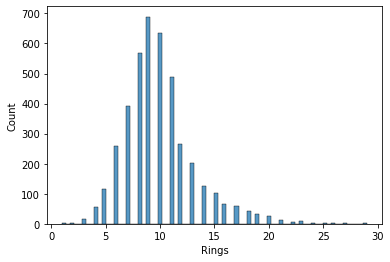

In [4]:
import seaborn as sns
sns.histplot(x=df['Rings'], data=df)

We are trying to predict the Rings value, but this dataset isn't widespread, so maybe the model can't fit it well. Its possible to get only the three rings that has the most appearance in the dataset to try get a better accuracy.

In [5]:
count_of_rings = y.value_counts()
rings_below_500 = []
for r,c in count_of_rings.items():
    if c < 500:
        rings_below_500.append(r)

In [6]:
for i in df.index:
    row = df.loc[i]
    if row['Rings'] in rings_below_500:
        df.drop(i,inplace=True)
X = df[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','F','I','M']]
y = df['Rings']

<AxesSubplot:xlabel='Rings', ylabel='Density'>

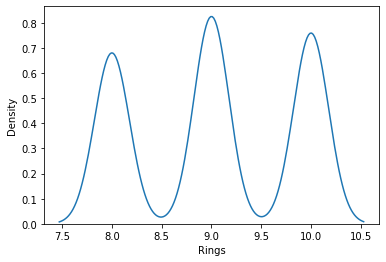

In [12]:
sns.kdeplot(x=df['Rings'], data=df)

Now, lets try training the model and see if the accuracy gets a little bit better.


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
score = clf.score(X_test,y_test)
f'The accuracy of the model is: {score*100:.2f}%'

'The accuracy of the model is: 47.18%'